In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
config_datasheet = r'./data/raw/Klausur.xlsx'
code_datasheet = r'./results/behavioral/compare/compare.xlsx'

In [4]:
raw = pd.read_excel(config_datasheet)
df = pd.DataFrame(raw)

In [10]:
nachname = ["Habermann", "Gütter", "Pötschke", "Progscha", "Schmidt", "Pfeifer", "Schadli", "Kühn", "Heyne",
           "Wenzel", "Jeong", "Stumm", "Dymek", "Knobloch", "Pönisch", "Schaftner", "Schöbel", "Meyer", "Jeromin"]

vorname = ["Tim", "Friedrich", "Katrin", "Simon", "Benjamin", "Robert Oliver", "Andreas", "Fränzi", "Louis",
          "Kristian", "Jiyun", "Constantin Hartmut", "Martin", "Philip", "Justin", "Sandra", "Richard", "Niclas", "Mathis"]
nichtmitgeschrieben = ["Schwarz, Melina", "Warias, Yannic"]


teilnehmer = pd.DataFrame()

for i in range(len(nachname)):
    teilnehmer = teilnehmer.append(df.loc[(df["Vorname"] == vorname[i]) & (df["Nachname"] == nachname[i])])

noten = []
punkte = []

tmp = df.loc[~((df.Nachname.isin(teilnehmer['Nachname']))&(df.Vorname.isin(teilnehmer['Vorname']))),:]

klausur_remove_not_passed = df.loc[df["Note"]== 5.0]

klausur_removed = df.loc[~((df.Note.isin(klausur_remove_not_passed['Note']))),:]



#print(df["Note"].value_counts())
#print(tmp["Note"].count())
#print(tmp["Note"].value_counts())




#print("Alle   ", round(df["Note"].mean(), 2), round(df["Punkte"].mean(), 2))
#print("Syntax ", round(teilnehmer["Note"].mean(), 2), round(teilnehmer["Punkte"].mean(), 2))
#print("Ohne   ", round(tmp["Note"].mean(), 2), round(tmp["Punkte"].mean(), 2))
#print("Removed", round(klausur_removed["Note"].mean(), 2), round(klausur_removed["Punkte"].mean(), 2))

#print(df["Note"])
    
import scipy.stats as stats

from pingouin import mwu



#ttest <.05 = signifikant 

#print(stats.shapiro(teilnehmer["Punkte"]), stats.shapiro(tmp["Punkte"].dropna()))
#print(stats.ttest_ind(teilnehmer["Punkte"], tmp["Punkte"].dropna()))

from cliffs_delta import cliffs_delta

mwu_punkte = mwu(teilnehmer["Punkte"], tmp["Punkte"].dropna())

print(mwu_punkte)
cliffs_delta_punkte = cliffs_delta(teilnehmer["Punkte"], tmp["Punkte"].dropna())
#5.0 Teilnehmer entfernen
#Tabelle teilen



klausur_df = pd.DataFrame([["Klausur", round(tmp["Punkte"].mean(), 2), round(teilnehmer["Punkte"].mean(), 2), round(mwu_punkte["p-val"][0], 2), round(cliffs_delta_punkte[0], 2)]], 
                         columns=["Gruppe", "Klausurergebnis", "Klausurergebnis2", "MWU", "Cliff's Delta"])

display(klausur_df)

import os 
with open(
    os.path.join(os.getcwd(),"klausurergebnisse.tex"), "w"
) as tf:
    tf.write(klausur_df
             .to_latex(
             index=False,
             caption="Klausurergebnisse: Punkte",
                 escape=False,
                 column_format="cccccc",
             ))


      U-val alternative     p-val       RBC      CLES
MWU  1100.5   two-sided  0.007409 -0.395688  0.697844


,Gruppe,Klausurergebnis,Klausurergebnis2,MWU,Cliff's Delta
0,Klausur,64.51,76.42,0.01,0.4


,Gruppen,Punkte
0,Testgruppe,76.420000
0,Kontrollgruppe,64.512048


count    19.000000
mean     76.421053
std      12.928503
min      54.500000
25%      70.750000
50%      75.500000
75%      84.250000
max      97.000000
Name: Punkte, dtype: float64
75.5


PermissionError: [Errno 13] Permission denied: 'results/behavioral/Klausur.pdf'

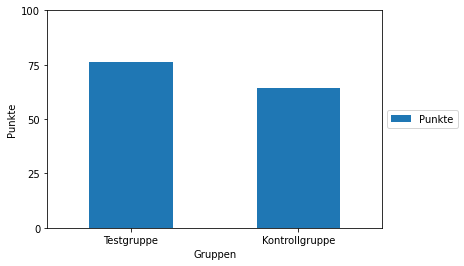

In [52]:
bar_df = pd.DataFrame([],columns=["Gruppen", "Punkte"])


teilnehmer_note = teilnehmer["Note"].mean()
teilnehmer_punkte = round(teilnehmer["Punkte"].mean(), 2)

nicht_teilnehmer_note = tmp["Note"].mean()
nicht_teilnehmer_punkte = tmp["Punkte"].mean()


#bar_df = bar_df.append(pd.DataFrame([[teilnehmer_punkte, nicht_teilnehmer_punkte]], columns=["Kontrollgruppe", "Testgruppe"]))
bar_df = bar_df.append(pd.DataFrame([[teilnehmer_punkte, "Testgruppe"]], columns=["Punkte", "Gruppen"]))
bar_df = bar_df.append(pd.DataFrame([[nicht_teilnehmer_punkte, "Kontrollgruppe"]], columns=["Punkte", "Gruppen"]))

display(bar_df)


print(teilnehmer["Punkte"].dropna().describe())

print(teilnehmer["Punkte"].dropna().median())

bar_df = bar_df.set_index('Gruppen')
ax = bar_df.plot.bar(ylabel='Punkte', rot=0)
ax.yaxis.set_ticks(np.arange(0, 125, 25))
ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.savefig("results/behavioral/Klausur.pdf", bbox_inches='tight', pad_inches=0.01)

In [7]:
from cliffs_delta import cliffs_delta

print(teilnehmer["Punkte"])


print(tmp["Punkte"].dropna())

cliffs_delta(teilnehmer["Punkte"], tmp["Punkte"].dropna())


21    72.0
20    76.5
63    56.0
64    80.0
78    54.5
59    90.0
73    72.5
40    75.5
27    69.5
97    81.0
30    55.5
90    87.5
14    74.5
34    94.5
61    97.0
74    95.5
79    65.5
52    79.5
31    75.0
Name: Punkte, dtype: float64
3      62.5
4      66.5
5      62.5
6      73.0
7      53.0
       ... 
100    65.0
101    67.5
102    76.5
103    50.5
104    92.5
Name: Punkte, Length: 83, dtype: float64


(0.39568801521876984, 'medium')

In [8]:
cliffs_delta(teilnehmer["Punkte"], tmp["Punkte"].dropna())


teilnehmer_box = pd.DataFrame(teilnehmer["Punkte"], columns=["Punkte"])
teilnehmer_box["Gruppe"] = "Testgruppe"


rest_box = pd.DataFrame(tmp["Punkte"].dropna(), columns=["Punkte"])
rest_box["Gruppe"] = "Kontrollgruppe"

print(rest_box)

zusammen = [teilnehmer_box, rest_box]

klausur_plot = pd.concat(zusammen)


#test_df = pd.DataFrame(data=d)
#print(test_df)


     Punkte          Gruppe
3      62.5  Kontrollgruppe
4      66.5  Kontrollgruppe
5      62.5  Kontrollgruppe
6      73.0  Kontrollgruppe
7      53.0  Kontrollgruppe
..      ...             ...
100    65.0  Kontrollgruppe
101    67.5  Kontrollgruppe
102    76.5  Kontrollgruppe
103    50.5  Kontrollgruppe
104    92.5  Kontrollgruppe

[83 rows x 2 columns]


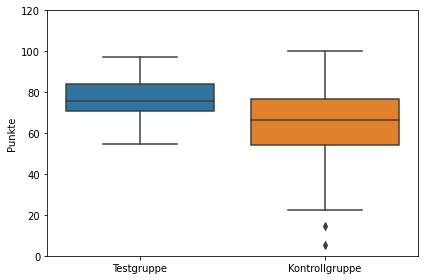

In [54]:
ax = sns.boxplot(x="Gruppe", y="Punkte", data=klausur_plot)
ax.set_xticklabels(ax.get_xticklabels())
plt.ylim(0, 120)

ax.set_xlabel("")

plt.tight_layout()
plt.savefig("results/behavioral/klausur_boxplot.pdf", bbox_inches='tight', pad_inches=0.01)

(array([0., 0., 0., 0., 0., 3., 2., 9., 2., 3.]),
 array([  5.5 ,  14.95,  24.4 ,  33.85,  43.3 ,  52.75,  62.2 ,  71.65,
         81.1 ,  90.55, 100.  ]),
 <BarContainer object of 10 artists>)

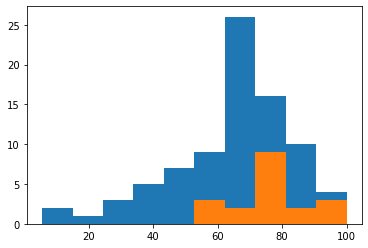

In [43]:
bins=np.histogram(np.hstack((tmp["Punkte"].dropna(),teilnehmer["Punkte"])), bins=10)[1] #get the bin edges
plt.hist(tmp["Punkte"], bins)
plt.hist(teilnehmer["Punkte"], bins)


In [48]:


ax.groupby("Punkte").distance.describe().unstack()


plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'groupby'

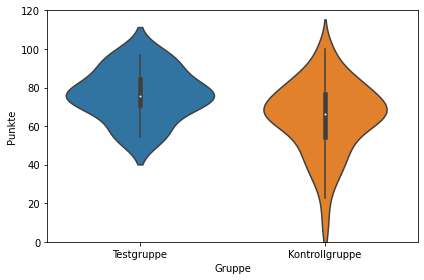

In [11]:
ax = sns.violinplot(x="Gruppe", y="Punkte", data=klausur_plot)
ax.set_xticklabels(ax.get_xticklabels())
plt.ylim(0, 120)


plt.tight_layout()
plt.savefig("results/behavioral/klausur_violinplot.pdf", bbox_inches='tight', pad_inches=0.01)

In [18]:
from researchpy import ttest

d = {'Testgruppe': teilnehmer["Punkte"], 'Kontrollgruppe': tmp["Punkte"].dropna()}


#print("MEDIAN", np.median(correctness_same_list_pre))
#print("MEDIAN", np.median(correctness_same_list_post))

print("MEDIAN", np.median(teilnehmer["Punkte"]))
print("MEDIAN", np.median(tmp["Punkte"].dropna()))
test_df = pd.DataFrame(data=d)

MEDIAN 75.5
MEDIAN 66.5
